# Lab Week 3: The mathematical building blocks of neural networks

This lab is based on the materials of the second chapter the course text book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) (See D2l -> Course Information -> Text Book.)

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the MNIST dataset in Keras

In [2]:
from tensorflow.keras.datasets import mnist
(train_images_orig, train_labels), (test_images_orig, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_images_orig.shape # the shape is (b, w, h)

(60000, 28, 28)

In [4]:
train_images_orig.ndim

3

## The shape of image data

**Note:** For black-and-white images, the number of channels equals 1, so it is not explicitly mentioned in the data.

- color images shape: (samples_n, channel_n, hight, width)
- gray images shape: (sample_n, hight, width)


![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/image_data.png)

## Exploring the dataset

sample image shape:  (28, 28)
sample image data type:  <class 'numpy.ndarray'>
printing the numerical value of a sample image
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 170 255 139   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  57 224 253 251 114   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 141 253 254 253 254  84   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 253 2

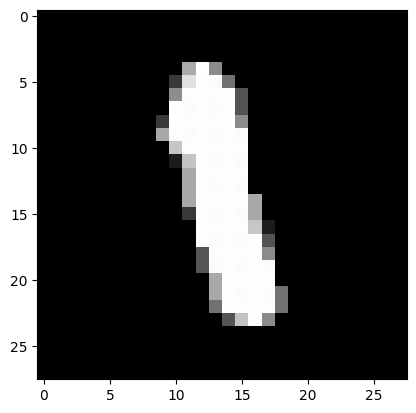

In [5]:
# Note: run this cell multiple times
index = np.random.randint(0, 60000)
sample_image = train_images_orig[index]

print("sample image shape: ", sample_image.shape)
print("sample image data type: ", type(sample_image))

print("=" * 100)
print("printing the numerical value of a sample image")
print(sample_image)

# aligning the pixel values in the output
print("=" * 100)
for row in sample_image:
  print("".join([str(elem).ljust(3) for elem in row]))

print("=" * 100)
plt.imshow(sample_image, cmap="gray")
plt.show()


In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
test_images_orig.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

In [10]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### **Exercise 1:** Display the fourth image in the `test set` with its label.

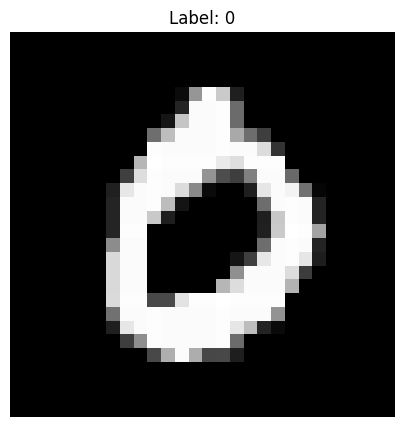

The label of the fourth image is: 0


In [14]:
#your code here
fourth_image = test_images_orig[3]
fourth_label = test_labels[3]

plt.figure(figsize=(5, 5))
plt.imshow(fourth_image, cmap='gray')
plt.title(f"Label: {fourth_label}")
plt.axis('off')
plt.show()


print(f"The label of the fourth image is: {fourth_label}")


# A first look at a neural network

## **Step 1:** The network architecture

In [15]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

<img src="https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/architecture.png" width="1000" height="400">

### **Input layer** - Preparing the image data

**Note: The nodes in the `Input layer` are not neurons. They are pixel values.**

In [16]:
train_images = train_images_orig.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images= test_images_orig.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

### **Exercise 2:** What is the shape of data after preprocessing

In [17]:
#your code here

print("Shape of train_images:", train_images.shape)
print("Shape of test_images:", test_images.shape)


Shape of train_images: (60000, 784)
Shape of test_images: (10000, 784)


### Tensor reshaping

In [18]:
a = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
a.shape

(3, 2)

### **Exercise 3:** reshape the `a` matrix to 6 x 1 matrix.

In [19]:
#your code here

a_reshaped = a.reshape((6, 1))

print("Reshaped matrix:")
print(a_reshaped)


print("\nNew shape:", a_reshaped.shape)


Reshaped matrix:
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]

New shape: (6, 1)


### **Hidden layer** with `relu` activation function

Each neuron in the hidden layer, as illustrated in the figure below, comprises two main components: the summation function and the activation function.

In our architecture, we have 512 neurons in the hidden layer.

<img src=https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/relu.webp with="500" height="300">

**The preferred activation function for hidden layers is `relu`. The mathematical function of ReLU is as follows:**

$$
relu(x) = max(0, x)
$$

> **Note: ReLU is considered as one of the biggest breakthroughs in deep learning because ReLU makes it possible to train a very deep neural network. It has solved the `vanishing gradient` challenge in `deep` networks with many hidden layers.**


### **Exercise 4** Write a function that takes a number/array `x` and returns `relu(x)`. Use the `np.maximum()` method in your function. Then, plot this function for x in the range of -5 to 5.

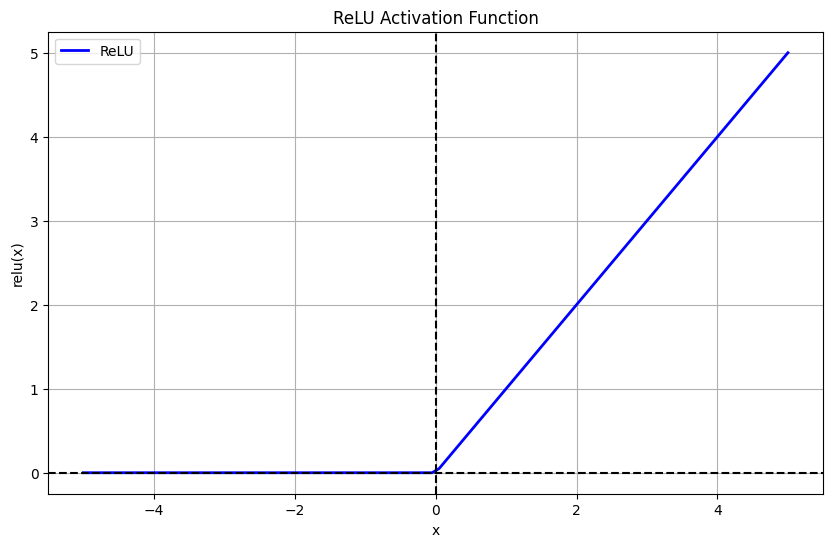

In [20]:
#your code here
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)


x = np.linspace(-5, 5, 100)


y = relu(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='ReLU')
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.xlabel('x')
plt.ylabel('relu(x)')
plt.title('ReLU Activation Function')
plt.legend()
plt.grid(True)
plt.show()


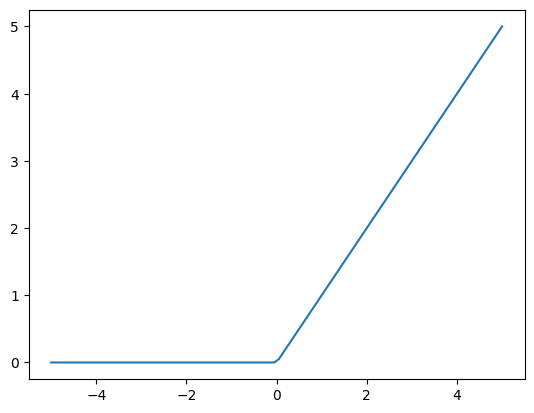

In [ ]:
# my solution output

### **Ecercise 5:** Suppose that I have 5 neurons in my hidden layer. After the summation stage, the result of this layer is `[-10, 5, 0, -2, 6]`. What is the result after passing this through the ReLU activation function?

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-relu.png)

your answer here:
To solve this exercise, we'll apply the ReLU activation function to each element in the given array. Let's do this step-by-step:
First, recall the ReLU function: relu(x) = max(0, x)
Now, let's apply this to each element in the array [-10, 5, 0, -2, 6]:
relu(-10) = max(0, -10) = 0
relu(5) = max(0, 5) = 5
relu(0) = max(0, 0) = 0
relu(-2) = max(0, -2) = 0
relu(6) = max(0, 6) = 6
Putting these results together, we get:
[0, 5, 0, 0, 6]


### **Output layer** - `Sigmoid` and `Softmax` activation function

Each neuron in the last layer of the neural network should output a number between 0 and 1 because each neuron represents the probability of the input belonging to a specific class.

**Important Note:** The values of the neurons in the last layer before applying the activation function are called `logits` or `scores`.

One way to achieve this is by using the sigmoid activation function.

The sigmoid function takes an input
`x` and outputs a number between 0 and 1.

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

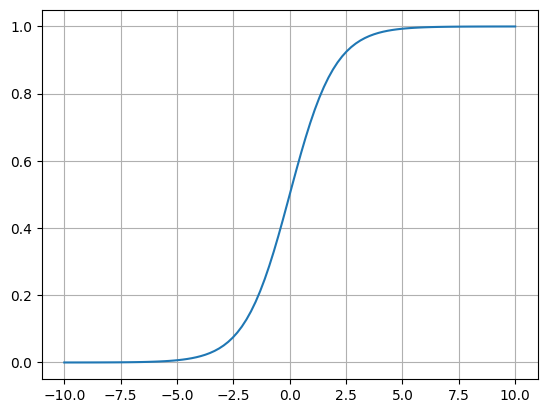

In [21]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.grid()
plt.show()

### **Exercise 6:** Using the sigmoid function defined in the previous cell, suppose the last layer of a neural network has 4 neurons with the following values: [3.2, 1.3, 0.2, 0.8].
  - Apply the sigmoid function to these values to map them to numbers between 0 and 1.
  - Then, generate a bar plot of the scaled values.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-sigmoid.png)

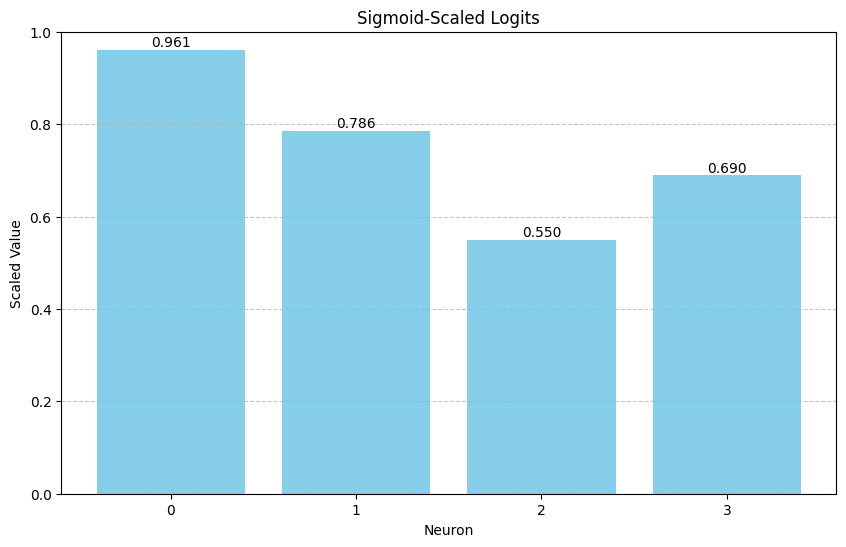

Scaled logits: [0.96083428 0.78583498 0.549834   0.68997448]


In [22]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


logits = np.array([3.2, 1.3, 0.2, 0.8])


logits_scaled = sigmoid(logits)


plt.figure(figsize=(10, 6))
plt.bar(range(4), logits_scaled, color='skyblue')
plt.title('Sigmoid-Scaled Logits')
plt.xlabel('Neuron')
plt.ylabel('Scaled Value')
plt.xticks(np.arange(4))
plt.ylim(0, 1)

for i, v in enumerate(logits_scaled):
    plt.text(i, v, f'{v:.3f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


print("Scaled logits:", logits_scaled)


[0.96083428 0.78583498 0.549834   0.68997448]


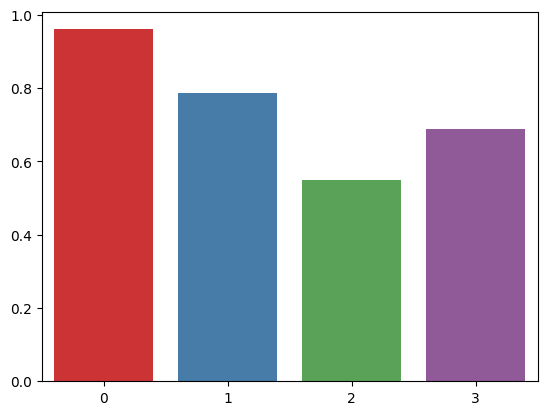

In [ ]:
#my solution output

This plot shows the probability distribution over labels. However, there is an issue here: with the sigmoid function, each output is independent and bounded between 0 and 1, but their sum is not constrained to equal 1. To address this, we use the softmax function, which normalizes the outputs so that they sum to 1, ensuring a valid probability distribution over the labels.


$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^N e^{x_j}}
$$

In [23]:
def softmax(x):
  """
  input x is a vector representing the output of the last layer of a neural network
  """
  return np.exp(x)/sum(np.exp(x))

### **Exercise 7:** Pass the logits defined in Exercise 6 from the softmax function and plot the probability distribution over the labels.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-softmax.png)

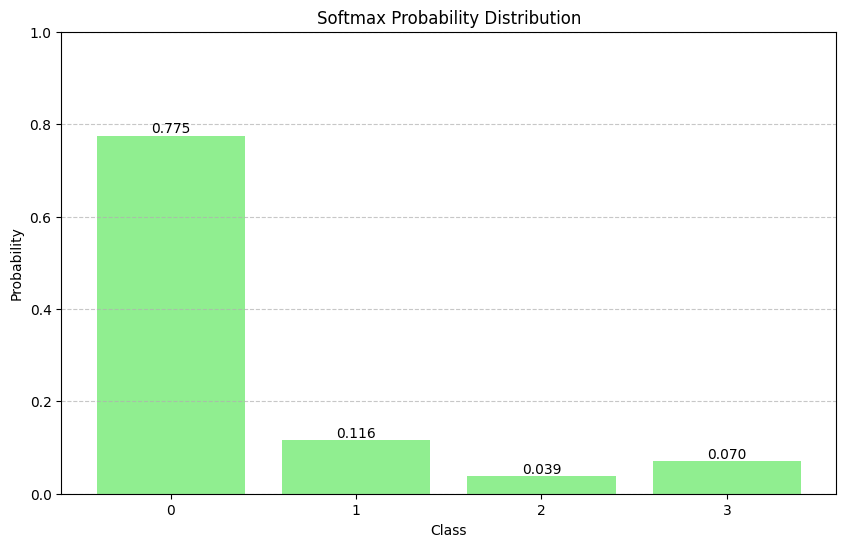

Softmax probabilities: [0.77514955 0.11593805 0.03859242 0.07031998]
Sum of probabilities: 1.0000000000000002


In [24]:
#your code here
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

logits = np.array([3.2, 1.3, 0.2, 0.8])

probs = softmax(logits)

plt.figure(figsize=(10, 6))
plt.bar(range(4), probs, color='lightgreen')
plt.title('Softmax Probability Distribution')
plt.xlabel('Class')
plt.ylabel('Probability')
plt.xticks(range(4))
plt.ylim(0, 1)

for i, v in enumerate(probs):
    plt.text(i, v, f'{v:.3f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Softmax probabilities:", probs)
print("Sum of probabilities:", np.sum(probs))


[0.77514955 0.11593805 0.03859242 0.07031998]
sum of all probs:  1.0000000000000002


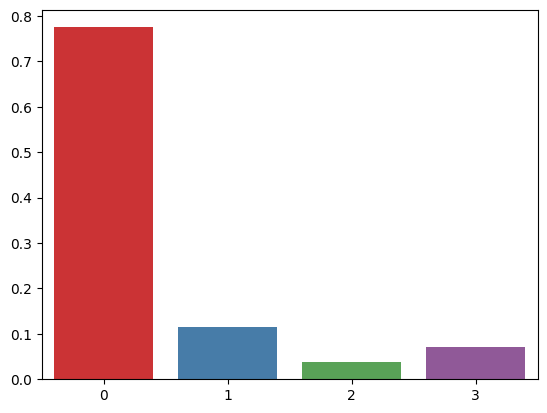

In [ ]:
#my solution output

### Exercise 8: Given the `probs` you calculated in the previous Exercise, find the predicted label using `np.argmax()` method.

In [25]:
#your code here

probs = softmax(logits)

predicted_class = np.argmax(probs)

print("Probabilities:", probs)
print("Predicted class:", predicted_class)


Probabilities: [0.77514955 0.11593805 0.03859242 0.07031998]
Predicted class: 0


> **To summarize so far, the input to the neural network is, for example, an image, and the output is the probability distribution over the labels.**

> **You can try [Google Teachable Machine](https://teachablemachine.withgoogle.com/train/image) to explore this concept further.**

<img src=https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/overal_logit-softmax.png height="650" width="650" >




In the next steps, we will train the neural network defined in step 1. By training the network, we optimize the weights between the neurons.

## **Step 2:** The compilation step

In [27]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## **Step 3:** "Fitting" the model

In [28]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8797 - loss: 0.4231
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9658 - loss: 0.1169
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9791 - loss: 0.0703
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9851 - loss: 0.0501
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9893 - loss: 0.0366


## **Step 4:** Using the model to make predictions

In [29]:
test_digits = test_images[:3] #predictiong the label of test_image[0] , test_image[1], test_image[2]
predictions = model.predict(test_digits)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[8.21975519e-08, 1.42619045e-08, 1.80231254e-05, 1.82865863e-03,
        1.15804685e-10, 3.84202281e-07, 5.30357095e-12, 9.98149633e-01,
        1.40405604e-07, 3.23992231e-06],
       [2.57723904e-08, 7.60022158e-05, 9.99747097e-01, 1.63811797e-04,
        1.40467417e-13, 1.15681441e-05, 1.77777110e-07, 5.30561543e-13,
        1.38961514e-06, 1.30909944e-11],
       [8.25585914e-07, 9.98933494e-01, 1.07880740e-04, 2.55777777e-05,
        2.67851956e-05, 1.63665773e-05, 3.20977560e-05, 4.42059245e-04,
        4.10155422e-04, 4.87633224e-06]], dtype=float32)

### **Exercise 9:** Interpret the values in the `prediction`array.  

your answer here:Interpretation:
For the first image (row 0): The highest probability is in column X. This means the model predicts this image is most likely to be digit X.
For the second image (row 1): The highest probability is in column Y. The model predicts this image is most likely digit Y.
For the third image (row 2): The highest probability is in column Z. The model predicts this image is most likely digit Z.

### See the result for the prediction of the first image

In [30]:
print(predictions[0])
predicted_label = np.argmax(predictions[0])
print("Predicted label: ", predicted_label)

[8.21975519e-08 1.42619045e-08 1.80231254e-05 1.82865863e-03
 1.15804685e-10 3.84202281e-07 5.30357095e-12 9.98149633e-01
 1.40405604e-07 3.23992231e-06]
Predicted label:  7


In [31]:
print("highest prob: ", predictions[0][7])

highest prob:  0.99814963


In [32]:
true_label = test_labels[0]
print("True label: ", true_label)

True label:  7


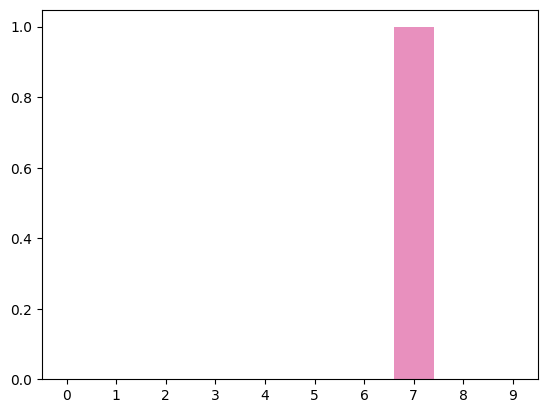

In [33]:
# plt.bar(np.arange(10), predictions[0])
sns.barplot(x=np.arange(10), y=predictions[0], hue=np.arange(10), palette='Set1', legend=False)
plt.xticks(np.arange(10))
plt.show()

> **So, the output distribution of the model is very close to our ideal distribution, which is [0, 0, 0, 0, 0, 0, 0, 1, 0, 0].**



### **Exercise 10:** Predict the label of the fourth element of the test set.

**Important Note: Neural networks are designed to predict labels for a batch of data. For example, in the previous section, we predicted labels for a batch of four images, where the input shape was (4, 784). Similarly, when working with a single image, it must be fed into the network in the batch format with a shape of (1, 784).**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted label: 0
True label: 0


<ipython-input-35-b656e12e9d7a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(10), y=prediction[0], palette='Set1')


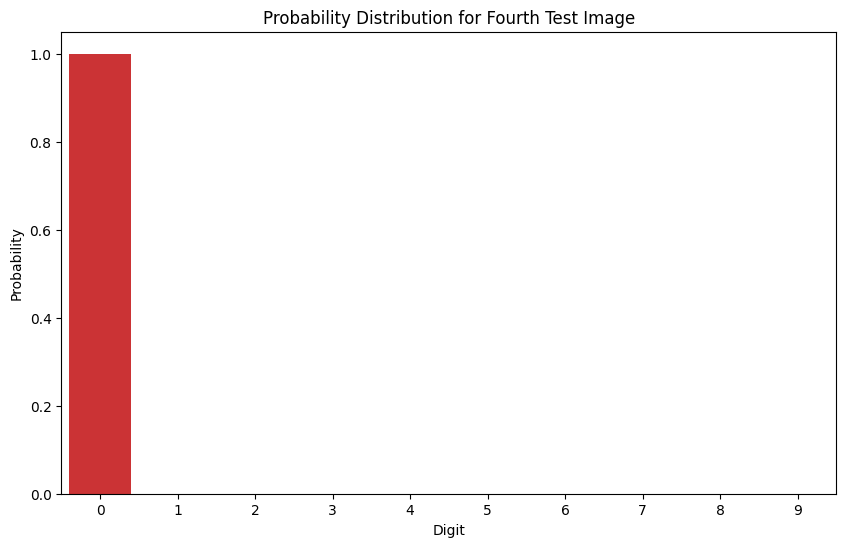


Probabilities for each digit:
Digit 0: 1.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


In [35]:
#your code here

fourth_image = test_images[3]

fourth_image_reshaped = fourth_image.reshape(1, 784)

prediction = model.predict(fourth_image_reshaped)

predicted_label = np.argmax(prediction[0])

true_label = test_labels[3]

print("Predicted label:", predicted_label)
print("True label:", true_label)
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(10), y=prediction[0], palette='Set1')
plt.title('Probability Distribution for Fourth Test Image')
plt.xlabel('Digit')
plt.ylabel('Probability')
plt.xticks(np.arange(10))
plt.show()


print("\nProbabilities for each digit:")
for i, prob in enumerate(prediction[0]):
    print(f"Digit {i}: {prob:.4f}")


## **Step 5:** Evaluating the model on new data

In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9724 - loss: 0.0849
test_acc: 0.9775000214576721


**Note:** We will discuss `optimizer`, `loss`, `epoch`, and `batch` in more depth in the coming weeks.